### Web scraping is the process of collecting and parsing raw data from the Web, and the Python community has come up with some pretty powerful web scraping tools.

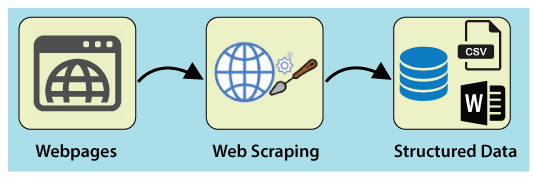

These are the following steps to perform web scraping. Let's understand the working of web scraping.

Step -1: Find the URL that you want to scrape

First, you should understand the requirement of data according to your project. A webpage or website contains a large amount of information. That's why scrap only relevant information. In simple words, the developer should be familiar with the data requirement.

Step - 2: Inspecting the Page

The data is extracted in raw HTML format, which must be carefully parsed and reduce the noise from the raw data. In some cases, data can be simple as name and address or as complex as high dimensional weather and stock market data.

Step - 3: Write the code

Write a code to extract the information, provide relevant information, and run the code.

Step - 4: Store the data in the file

Store that information in required csv, xml, JSON file format

In [1]:
# load library
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
from csv import writer
from datetime import datetime
import os

#-------web scraping using beautifulsoup -------------#
today = datetime.today()
day = today.day
month = today.month
year = today.year
newdate= str(day)+'_'+str(month)+'_'+str(year)

list_data = [
    'bajra-pearl-milletcumbu',
    'bengal-gram-dal-chana-dal',
    'chili-red',
    'coconut',
    'cotton',
    'dry-grapes',
    'green-chilli',
    'maize',
    'onion',
    'potato',
    'rice',
    'soyabean',
    'sugarcane',
    'sunflower',
    'sweet-potato',
    'tomato',
    'water-melon',
    'wheat'
]
for names in list_data:
    outname = names+newdate+".csv"
#     outdir = './static/mandiprices'
#     if not os.path.exists(outdir):
#         os.mkdir(outdir)
#     fullpath = os.path.join(outdir, outname)

    print("==========================================================// {} //================================================================".format(names))
    # -------------   Create  CSV File -------------------------------------------- #
    df = pd.DataFrame({'Arrival Date':[''], 'Variety':[''], 'State':[''],'Market':[''],'Min / Max Price (Rs./Quintal)':[''],'Average price (Rs./Quintal)':['']}).to_csv(outname,index=False)
    #--------------- OPEN CSV FILE ------------------------------------------------#
    with open(outname, 'a') as f_object:
        try:
            siteUrl = "https://www.commodityonline.com/mandiprices/{}".format(names)
            responce = get(siteUrl)
            main_container = BeautifulSoup(responce.text, 'html.parser')
            sub_container = main_container.find('table', {'id': 'main-table2'})
            main_table = sub_container.find_all('tr')
            for rows in main_table:
                try:
                    data = rows.find_all('td')
                    item_list = []
                    for rows2 in data:
                        try:
                            item_list.append(rows2.text)
                        except:
                            pass
                    try:
                        print('Arrival Date : ', item_list[1])
                        print("Variety : ", item_list[2])
                        print("State : ", item_list[3])
                        print("Market : ", item_list[4])
                        print("Min / Max Price (Rs./Quintal) : ", item_list[5])
                        print("Average price (Rs./Quintal) : ", item_list[6])
                        print("=================================================================================================================================")
                        # -----------------   load data in CSV   -----------------------------------------------------------------#
                        List = [item_list[1], item_list[2], item_list[3], item_list[4], item_list[5], item_list[6]]
                        writer_object = writer(f_object)
                        writer_object.writerow(List)
                    except:
                        pass

                except:
                    pass
        except:
            pass
    f_object.close()




==========================================================// bajra-pearl-milletcumbu //================================================================
Arrival Date :  21/04/2022
Variety :  Hybrid
State :  Uttar Pradesh
Market :  Jasvantnagar
Min / Max Price (Rs./Quintal) :  2000.00 - 2100.00
Average price (Rs./Quintal) :  2050.00 
Arrival Date :  21/04/2022
Variety :  Other
State :  Gujarat
Market :  Visnagar
Min / Max Price (Rs./Quintal) :  1650.00 - 2275.00
Average price (Rs./Quintal) :  1962.00 
Arrival Date :  21/04/2022
Variety :  Hybrid
State :  Karnataka
Market :  Bellary
Min / Max Price (Rs./Quintal) :  1909.00 - 2329.00
Average price (Rs./Quintal) :  2162.00 
Arrival Date :  21/04/2022
Variety :  Other
State :  Maharashtra
Market :  Devala
Min / Max Price (Rs./Quintal) :  2190.00 - 2325.00
Average price (Rs./Quintal) :  2325.00 
Arrival Date :  21/04/2022
Variety :  Hybrid
State :  Uttar Pradesh
Market :  Rura
Min / Max Price (Rs./Quintal) :  1750.00 - 1800.00
Average price (